**Homework 3: Neural Network**
1. Pakapak Silpapinun ID:62340500042
2. Supana Somtuy ID:62340500055

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/SniiceS/503-HW3/main/Data/train.csv')

In [4]:
df_test = pd.read_csv('https://raw.githubusercontent.com/SniiceS/503-HW3/main/Data/test.csv')

In [5]:
df_train.shape

(42000, 785)

To create the machine learning neural netwotk model, we use tensorflow. First, we separate output from the dataset. Then we change the numeric label value to nominal value to perform a classification.

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense


x = df_train.iloc[:,1:]    # attribute
row,col = x.shape
onehot_label = np.zeros((row,10))   # to classify the multi-class classification
for i in range(row):
    onehot_label[i, df_train.label[i]] = 1
y = pd.DataFrame(onehot_label,columns=['0','1','2','3','4','5','6','7','8','9'])

We create the model with 2 hidden layer containing 28 and 10 nodes, respectively. For the activation fuction in hidden nodes, we use sigmoid function (on-off choice). For the output layer, the softmax function is applied (it was suggested for the classification problem).

In [9]:
model = Sequential()

model.add(Dense(28,activation='sigmoid'))
model.add(Dense(14,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

Then to perform a stop criteria, we decide to stop the training when the loss is constant for 50 epochs.

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
history = model.fit(x,y,epochs=200, batch_size=1, callbacks=[callback],verbose=1)
len(history.history['loss'])

Epoch 1/200
42000/42000 [==============================] - 16s 379us/step - loss: 0.2757 - accuracy: 0.4963
Epoch 2/200
42000/42000 [==============================] - 16s 371us/step - loss: 0.1954 - accuracy: 0.6608
Epoch 3/200
42000/42000 [==============================] - 16s 376us/step - loss: 0.1634 - accuracy: 0.7303
Epoch 4/200
42000/42000 [==============================] - 17s 397us/step - loss: 0.1500 - accuracy: 0.7412
Epoch 5/200
42000/42000 [==============================] - 15s 365us/step - loss: 0.1350 - accuracy: 0.7745
Epoch 6/200
42000/42000 [==============================] - 15s 360us/step - loss: 0.1354 - accuracy: 0.7766
Epoch 7/200
42000/42000 [==============================] - 15s 357us/step - loss: 0.1245 - accuracy: 0.7934
Epoch 8/200
42000/42000 [==============================] - 15s 355us/step - loss: 0.1196 - accuracy: 0.8060
Epoch 9/200
42000/42000 [==============================] - 15s 367us/step - loss: 0.1246 - accuracy: 0.7835
Epoch 10/200
42000/42000 [==

200

The changing of loss can be seen as following graph.

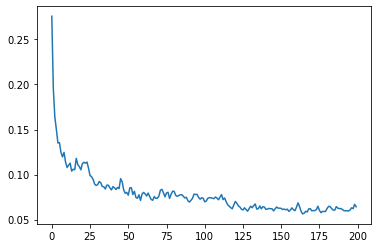

In [11]:
plt.plot(history.history['loss'])

To test the model performance, we apply the model to the testing set and then submit it to the testing serve.

In [12]:
output = model.predict(df_test.values)
result = []
for i in output:
    for j in range(10):
        if i[j] == max(i):
            result.append([len(result)+1,j])
output = pd.DataFrame(np.array(result),columns=['ImageId','Label'])
output.to_csv('result.csv')
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,2
